In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [2]:
# import some data to play with
company_df = pd.read_csv('D:/Work/Data Science and Analyst Course/ExcelR/Data Science/Assignments/14_Decision Trees/Company_Data.csv',index_col=0)

In [3]:
df_company=company_df.reset_index()

In [4]:
df_company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [5]:
df_company.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [6]:
df_company.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [7]:
df_company.Sales.mean()

7.496325

### Converting Sales column into Categorical variable with name 'High Sales' and 'low sales'

In [8]:
df_company["sales"]="<=7.5"
df_company.loc[df_company["Sales"]>=7.5,"sales"]="High Sales"
df_company.loc[df_company["Sales"]<=7.5,"sales"]="Low Sales"

In [9]:
df_company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,High Sales
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,High Sales
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,High Sales
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,Low Sales
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,Low Sales
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes,High Sales
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes,Low Sales
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes,Low Sales
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes,Low Sales


In [10]:
df_company.drop(['Sales'],axis=1)


,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales
0,138,73,11,276,120,Bad,42,17,Yes,Yes,High Sales
1,111,48,16,260,83,Good,65,10,Yes,Yes,High Sales
2,113,35,10,269,80,Medium,59,12,Yes,Yes,High Sales
3,117,100,4,466,97,Medium,55,14,Yes,Yes,Low Sales
4,141,64,3,340,128,Bad,38,13,Yes,No,Low Sales
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,Good,33,14,Yes,Yes,High Sales
396,139,23,3,37,120,Medium,55,11,No,Yes,Low Sales
397,162,26,12,368,159,Medium,40,18,Yes,Yes,Low Sales
398,100,79,7,284,95,Bad,50,12,Yes,Yes,Low Sales


In [11]:
le=LabelEncoder()
select_columns=["ShelveLoc","Urban","US","sales"]
le.fit(df_company[select_columns].values.flatten())
df_company[select_columns]=df_company[select_columns].apply(le.fit_transform)

In [12]:
df_company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales
0,9.50,138,73,11,276,120,0,42,17,1,1,0
1,11.22,111,48,16,260,83,1,65,10,1,1,0
2,10.06,113,35,10,269,80,2,59,12,1,1,0
3,7.40,117,100,4,466,97,2,55,14,1,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1,0
396,6.14,139,23,3,37,120,2,55,11,0,1,1
397,7.41,162,26,12,368,159,2,40,18,1,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1,1


In [13]:
df_company.shape

(400, 12)

In [14]:
df_company['sales'].unique()

array([0, 1])

In [15]:
df_company.sales.value_counts()

1    202
0    198
Name: sales, dtype: int64

In [16]:
colnames = list(df_company.columns)
colnames

['Sales',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban',
 'US',
 'sales']

In [17]:
colnames=list(df_company.columns)

X=colnames[1:10]
Y=colnames[11]

In [18]:
X

['CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban']

In [19]:
Y

'sales'

In [20]:
# Splitting data into training and testing data set
train,test=train_test_split(df_company,test_size=0.3)

In [21]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model_train=model.fit(train[X],train[Y])
train_pred=model_train.predict(train[X])

In [22]:
pd.crosstab(train[Y],train_pred)

col_0,0,1
sales,,
0,120,12
1,61,87


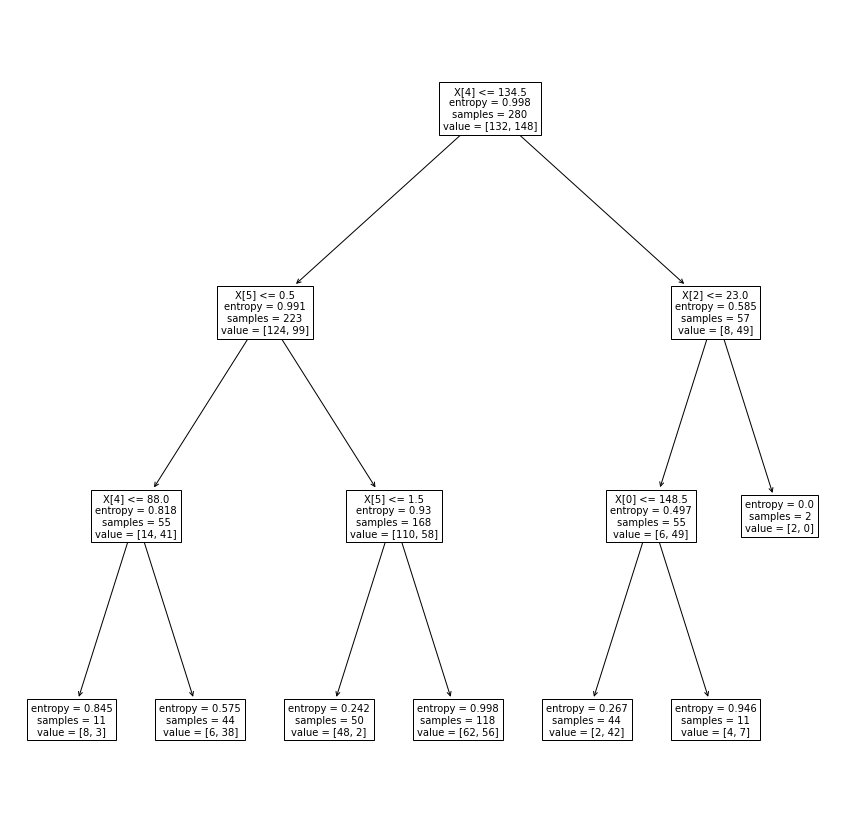

In [23]:
#PLot the decision tree
plt.figure(figsize=(15 , 15 ))

tree.plot_tree(model, fontsize=10);


In [25]:
### Training Accuracy
train_accu=np.mean(train.sales==model.predict(train[X]))
train_accu

0.7392857142857143

In [26]:
train_crosstab=pd.crosstab(train[Y],train_pred)
train_crosstab

col_0,0,1
sales,,
0,120,12
1,61,87


In [27]:
testmodel=model.fit(test[X],test[Y])
test_pred=testmodel.predict(test[X])
test_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [28]:
test_accu=np.mean(test.sales==testmodel.predict(test[X]))
test_accu

0.7583333333333333

In [29]:
test_crosstab=pd.crosstab(test[Y],test_pred)
test_crosstab

col_0,0,1
sales,,
0,62,4
1,25,29


### Building Decision Tree Classifier (CART) using Gini Criteria

In [30]:
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [31]:
model_gini.fit(train[X],train[Y])

DecisionTreeClassifier(max_depth=3)

In [32]:
#Prediction and computing the accuracy
y_gini_pred=model_gini.predict(test[X])


In [33]:
pd.crosstab(y_gini_pred,test[Y])

sales,0,1
row_0,,
0,54,27
1,12,27


In [34]:

accuracy_score(y_gini_pred , test[Y])

0.675